<div class="alert alert-block alert-success">
    <b>ARTIFICIAL INTELLIGENCE (E016330)</b> <br>
ALEKSANDRA PIZURICA <br>
GHENT UNIVERSITY <br>
AY 2022/2023 <br>
Assistent: Srdan Lazendic
</div>

# Lab assignment 5: CNNs and Autoencoders

In this assignment we will first train a CNN for the classification problem and then an autoencoderencoder that learns representations of images of the `fashion_mnist` dataset. Finally, you will create a simple image retrieval system by using the trained autoencoder and the nearest-neighbors algorithm.

### Dataset `Fashion MNIST`

This examples uses [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images split into 10 categories. Each image contains one peace of clothing or footwear. 
Resolution of each image is $28 \times 28$ pixels.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Image 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST examples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a replacement for the traditional [MNIST](http://yann.lecun.com/exdb/mnist/) dataset that was previously often used as the first illustrative data set for classification (with images). `MNIST` contains images of handwritten numbers in a very similar format as previously described for `Fashion MNIST`.

Fashion `MNIST` is a somewhat heavier set of data compared to `MNIST`, but both sets are extremely clean (no noise, deviations in the corners of the photo, relatively similar lighting), and solving the classification problem on them is not difficult.

In this example, we will use $40000$ images to train the network, $20000$ images for the validation and the other $10000$ images to evaluate how accurately our network has classified the images.

Since `Fashion MNIST` is a relatively well-known set that is often used, it is not uncommon for libraries to provide auxiliary functions for its download and use.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import metrics

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import backend
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Input, Reshape
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

2022-12-23 15:47:00.093853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-23 15:47:01.195734: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/seoyangsam/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-12-23 15:47:01.195818: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-23 15:47:03.319150: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerro

**Question 1:** Using the `load_data` function from the `fashion_mnist` package, load images for the training set and the test set.

In [2]:
# Load data set 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


**Question 2:** Select the first $40000$ images from the loaded set for training, and then the next $20000$ for validation.

In [4]:
x_val = x_train[40000:60000]
y_val = y_train[40000:60000]

In [5]:
x_train = x_train[:40000]
y_train = y_train[:40000]

**Question 3:** Transform the loaded images into the `float32` type, and then normalize them.

In [7]:
# Transform the images to float32 type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [8]:
# Normalize the images
x_train /= 255
x_val /= 255
x_test /= 255

## Part 1: CNN

**Question 4:** Create a convolutional neural network with the following properties:

- Sequential model consisting of convolutional and max pooling layers used alternately.
- Three convolutional layers consist of  $32$, $64$ and $128$  kernels, respectively and they are all of size $3\times 3$, with the  $\mathrm{ReLU}$  activation function.
- Each of the two max pooling layers is with the pool size  $2\times 2$.
- After the third convolutional layer use the `Flatten` layer.
- Finally, add on top two fully connected layers with $128$ and $10$  neurons, with $\mathrm{ReLU}$ and *softmax* activation functions, respectively.

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


2022-12-21 13:52:47.586977: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/seoyangsam/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-12-21 13:52:47.588252: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-21 13:52:47.588355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-12-21 13:52:47.591879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler f

**Question 5:** Train the previously defined network in $10$ epochs with the batch size equal to $32$. For the error, use `categorical cross entropy`, other parameters you may choose arbitrarily. Create a textual summary of your model.

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
train_labels_cat = tf.keras.utils.to_categorical(y_train, num_classes)
val_labels_cat = tf.keras.utils.to_categorical(y_val, num_classes)
test_labels_cat = tf.keras.utils.to_categorical(y_test, num_classes)

In [12]:
epochs = 10
batch_size = 32

history = model.fit(x_train, train_labels_cat, epochs = epochs,
                    batch_size = batch_size,  validation_data = (x_val, val_labels_cat))

Epoch 1/10
1250/1250 [==============================] - 23s 17ms/step - loss: 0.6267 - accuracy: 0.7706 - val_loss: 0.4555 - val_accuracy: 0.8327
Epoch 2/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.4181 - accuracy: 0.8464 - val_loss: 0.4070 - val_accuracy: 0.8498
Epoch 3/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.3538 - accuracy: 0.8710 - val_loss: 0.3706 - val_accuracy: 0.8637
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.3129 - accuracy: 0.8844 - val_loss: 0.3316 - val_accuracy: 0.8799
Epoch 5/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.2793 - accuracy: 0.8965 - val_loss: 0.3293 - val_accuracy: 0.8803
Epoch 6/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.2520 - accuracy: 0.9062 - val_loss: 0.3213 - val_accuracy: 0.8846
Epoch 7/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.2317 - accuracy: 0.9128 - val_loss: 0.3112 -

In [13]:
# Create a textual summary of our model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

**Question 6:** 
- Plot the accuracy on the training and validation datasets over training epochs. Add a legend.
- What do you observe from the obtained plot?
- How could you improve the previous model? Explain shortly!

313/313 - 2s - loss: 0.3545 - accuracy: 0.8875 - 2s/epoch - 5ms/step


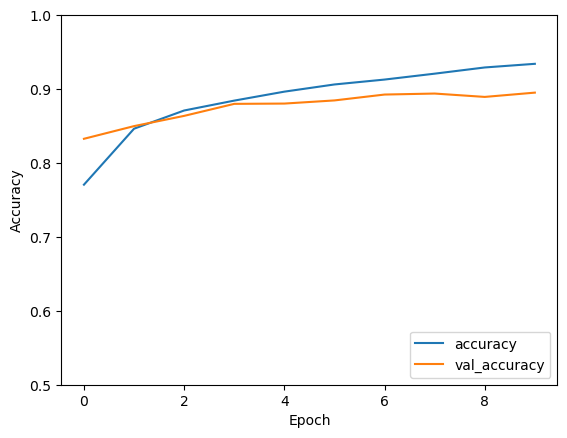

In [19]:
# Plot the accuracy on the training and validation datasets over training epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, test_labels_cat, verbose=2)

The accuracy on training is lower than validation accuracy at the firest epoch but since the second epoch it became higher. So our CNN is initially underfitting at the beginning. 

To improve the model:

Fine-tune the model's hyperparameters: You can also try adjusting the hyperparameters of the model, such as the learning rate, the batch size, and the number of epochs, to see if this improves the model's performance.

Use data augmentation: Data augmentation involves generating additional training data by applying random transformations to the existing data. This can help the model learn more robust features and improve its generalization to unseen data.

Add regularization: Regularization techniques, such as dropout and weight decay, can help prevent overfitting by adding constraints to the model's parameters.

Use a deeper or more complex model: A deeper or more complex model may be able to learn more about the patterns in the data and achieve higher accuracy. 

Try a different optimization algorithm: Different optimization algorithms can have different effects on the model's performance. 

Experiment with different preprocessing techniques: Preprocessing the data, such as normalizing or standardizing the inputs, can have a significant impact on the model's performance. 

## Part 2: Autoencoder

**Question 7:** Create an autoencoder network with the following properties:
- the `encoder` consists of $3$ convolutional and $3$ max pooling layers used alternately
    - convolutional layers consist of $64$, $32$ and $16$ kernels, respectively, of size $3\times 3$, and with the $\mathrm{ReLU}$ activation function 
    - each max pooling layer is with the pool size $2\times 2$
- the `decoder` consists of $3$ convolutional and $3$ up sampling layers used alternately
    - convolutional layers consist of $16$, $32$ and $64$ kernels, respectively, of size $3\times 3$, and with the $\mathrm{ReLU}$ activation function at each layer, except at the last (output) layer where the *sigmoid* activation function is used
    - each up sampling layer is with the usampling factors of size $2\times 2$.

Use the `Adam` optimizer and `MSE` error as a loss function. 

**Note:** Name the output of the final max pooling layer, i.e., the model that produces the latent representation, `encoder` (this will be useful for the second part of the assignment).

In [3]:
# Load data set 
(X_train, _), (X_test, _) = fashion_mnist.load_data()

In [4]:
image_size = X_train.shape[1]
print(image_size)

28


In [5]:
X_train = np.reshape(X_train, (-1, image_size, image_size, 1))
X_train = X_train.astype('float32') / 255

X_test = np.reshape(X_test, (-1, image_size, image_size, 1))
X_test = X_test.astype('float32') / 255

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_test.shape

(10000, 28, 28, 1)

In [8]:
noise = np.random.normal(loc=0.5, scale=0.5, size=X_train.shape)
X_train_noisy = X_train + noise

noise = np.random.normal(loc=0.5, scale=0.5, size=X_test.shape)
X_test_noisy = X_test + noise

# We will cut off the values that fell out of the range [0,1] after adding the noise
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [9]:
# Define the input shape
input_shape = (28, 28, 1)
latent_dim = 16

# Define the number of kernels for each convolutional layer
encoder_conv_kernels = [64, 32, 16]
decoder_conv_kernels = [16, 32, 64]

# Define the kernel size for all convolutional layers
kernel_size = (3, 3)

# Define the pool size for all max pooling layers
pool_size = (2, 2)

# Define the up sampling factors for all up sampling layers
up_sampling_factors = (2, 2)

# Define the encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs

for filters in encoder_conv_kernels:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               padding='same')(x)
    x = MaxPool2D(pool_size=pool_size,
                 padding='same')(x)

# Read and preserve the dimensions of the tensor
shape = backend.int_shape(x)

# Then we have a flattening layer
x = Flatten()(x)

latent_outputs = Dense(latent_dim, name='latent_vector')(x)

# Define the encoder model
encoder = Model(inputs=inputs, outputs=latent_outputs, name='encoder')
encoder.summary()

2022-12-23 15:48:03.194371: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/seoyangsam/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-12-23 15:48:03.196249: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-23 15:48:03.197325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-12-23 15:48:03.202437: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler f

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624

In [10]:
shape

(None, 4, 4, 16)

In [11]:
# Define the decoder model
# First we have the input layer
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

# Modify the kernel size in the first convolutional layer to (7, 7)
x = Conv2D(filters=16,
           kernel_size=kernel_size,
           activation='relu',padding='same')(x)

# Modify the up sampling factors in the first up sampling layer to (3, 3)
x = UpSampling2D(size=up_sampling_factors)(x)

x = Conv2D(filters=32,
           kernel_size=kernel_size,
           activation='relu',padding='same')(x)

# Modify the up sampling factors in the first up sampling layer to (3, 3)
x = UpSampling2D(size=up_sampling_factors)(x)

x = Conv2D(filters=16,
           kernel_size=kernel_size,
           activation='relu')(x)

# Modify the up sampling factors in the first up sampling layer to (3, 3)
x = UpSampling2D(size=up_sampling_factors)(x)



#for filters in decoder_conv_kernels[1:][::-1]:
    #x = Conv2D(filters=filters,
               #kernel_size=kernel_size,
               #activation='relu',
               #padding='same')(x)
    #x = UpSampling2D(size=up_sampling_factors)(x)
    
#for filters in decoder_conv_kernels[::-1]:
    #x = Conv2D(filters=filters,
               #kernel_size=kernel_size,
               #activation='relu',
               #padding='same')(x)
    #x = UpSampling2D(size=up_sampling_factors)(x)
 

# Define the output layer with sigmoid activation function
# then we add one more convolutional layer to control the channel dimension   
x = Conv2D(filters=1,
                    kernel_size=kernel_size,padding='same')(x)

# and one activation later with the sigmoid activation function
outputs = Activation('sigmoid', name='decoder_output')(x)

# Define the decoder model
decoder = Model(inputs=latent_inputs, outputs=outputs, name='decoder')
decoder.summary(line_length=110)

Model: "decoder"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 decoder_input (InputLayer)                      [(None, 16)]                                0                
                                                                                                              
 dense (Dense)                                   (None, 256)                                 4352             
                                                                                                              
 reshape (Reshape)                               (None, 4, 4, 16)                            0                
                                                                                                              
 conv2d_3 (Conv2D)                               (None, 4, 4, 16)                            23

In [30]:
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                27840     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         16081     
                                                                 
Total params: 43,921
Trainable params: 43,921
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Compile the model with the Adam optimizer and MSE loss function
autoencoder.compile(loss='mse', optimizer='adam')

**Question 8:** Train the autoencoder over $10$ epochs. Set the `shuffle` parameter to True. Set the `batch_size` to $128$.

In [71]:
history = autoencoder.fit(X_train_noisy,
                X_train, epochs=10, shuffle=True, batch_size=128,
                    validation_data=(X_test_noisy, X_test))

2022-12-22 23:56:19.710886: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-12-22 23:56:20.196319: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
469/469 [==============================] - 101s 210ms/step - loss: 0.0428 - val_loss: 0.0282
Epoch 2/10
469/469 [==============================] - 98s 208ms/step - loss: 0.0257 - val_loss: 0.0242
Epoch 3/10
469/469 [==============================] - 99s 211ms/step - loss: 0.0235 - val_loss: 0.0232
Epoch 4/10
469/469 [==============================] - 97s 206ms/step - loss: 0.0224 - val_loss: 0.0220
Epoch 5/10
469/469 [==============================] - 91s 194ms/step - loss: 0.0217 - val_loss: 0.0215
Epoch 6/10
469/469 [==============================] - 91s 193ms/step - loss: 0.0213 - val_loss: 0.0210
Epoch 7/10
469/469 [==============================] - 90s 191ms/step - loss: 0.0209 - val_loss: 0.0209
Epoch 8/10
469/469 [==============================] - 90s 191ms/step - loss: 0.0205 - val_loss: 0.0208
Epoch 9/10
469/469 [==============================] - 89s 190ms/step - loss: 0.0202 - val_loss: 0.0206
Epoch 10/10
469/469 [==============================] - 93s 199ms/step - 

**Question 9:** Plot loss on the training and validation datasets over the training epochs. Add a legend to your plot.

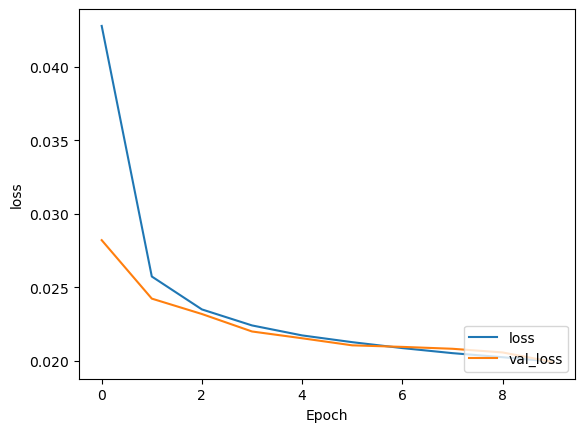

In [81]:
# Plot loss on the training and validation datasets over the training epochs
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

**Question 10:** Show for an arbitrary image of the test set how the autoencoder works. In other words, plot an arbitrary original and  predicted image from the test set.

In [82]:
X_decoded = autoencoder.predict(X_test_noisy)

313/313 [==============================] - 5s 12ms/step


In [84]:
from PIL import Image

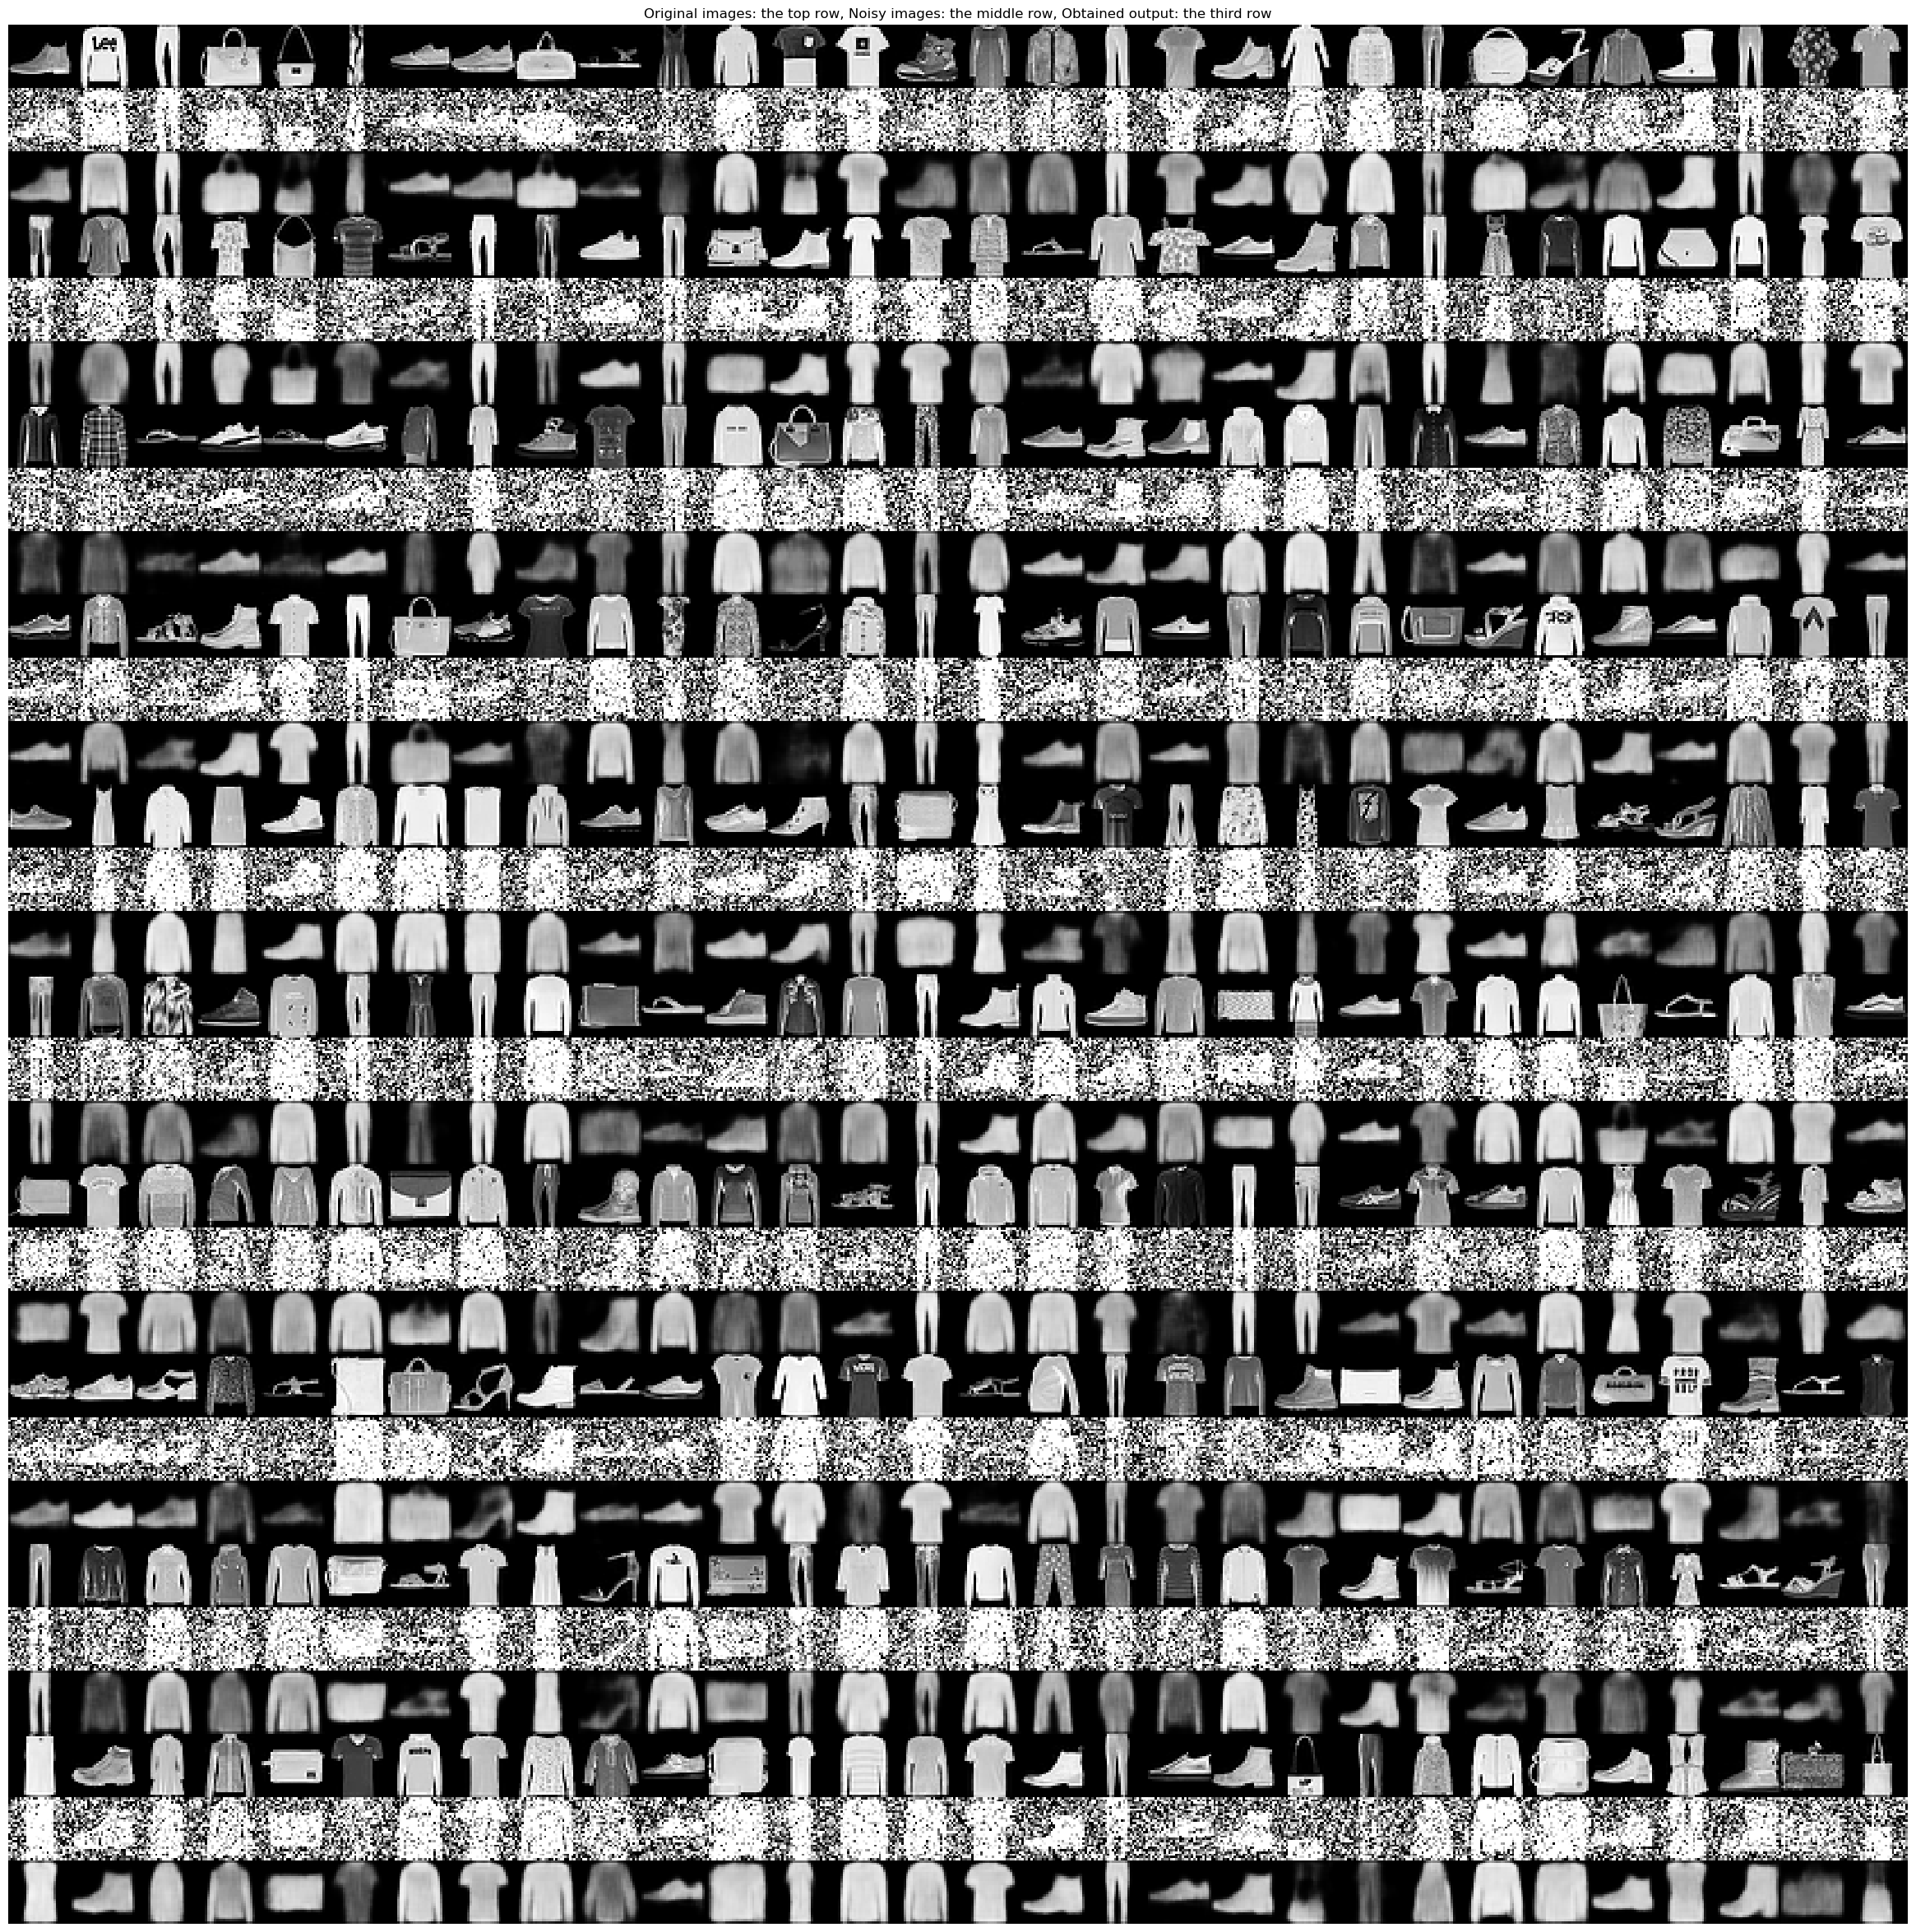

In [85]:
# We are preparing the panel for plotting the images
plt.figure(figsize=(30, 30))

# We extract 10x30 images
rows, cols = 10, 30
num = rows * cols

# We select the images: first the original ones, then the noisy ones, and then those generated by the autoencoder
imgs = np.concatenate([X_test[:num], X_test_noisy[:num], X_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))

# We organize the images such that they have the described shape
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)

plt.axis('off')
plt.title('Original images: the top row, '
          'Noisy images: the middle row, '
          'Obtained output: the third row')

# We are plotting the images
plt.imshow(imgs, interpolation='none', cmap='gray')

# We store the image generated in this way
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()

**Question 11:** Calculate the loss for the autoencoder on the test set.

In [87]:
# Calculate the difference between the reconstructed output and the original input
difference = X_decoded - X_test_noisy

# Calculate the mean squared error of the difference
loss = np.mean(np.square(difference))

print("Test loss:", loss)

Test loss: 0.25734143046252456


Now, we will use the learned autoencoder for **similar image retrieval** task. More precisely, we can compute the distance between the latent-space vectors to look for similar images. Naturally, the smaller the distance, the more visually similar two images are. 

Your goal is to create a very simple image retrieval system by using the trained autoencoder and the [nearest-neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) algorithm.

**Question 12:** 
    
- Extract the encoder part of your autoencoder model and save it in the folder as `encoder.h5`.
- Fit the encoder part on your test set and reshape the output in order to obtain the latent space vectors.
- Choose an arbitrary query image from the test set.

In [42]:
encoder.save('encoder.h5')

In [43]:
encoder = keras.models.load_model('encoder.h5')

In [44]:
encoder.compile(loss='mse', optimizer='adam')

In [49]:
# Fit the encoder model on the test set
latent_vectors = encoder.predict(X_test)

# Reshape the latent vectors to obtain a 2D array
latent_vectors = latent_vectors.reshape(10000,256)

313/313 [==============================] - 2s 6ms/step


ValueError: cannot reshape array of size 160000 into shape (10000,256)

In [142]:
import random

# Choose a random index
index = random.randint(0, len(X_test))

# Select the query image from the test set
query_image = X_test[index]

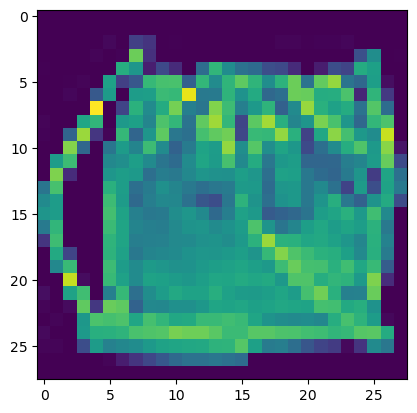

In [143]:
# Reshape the image data to a 2D array
query_image = query_image.reshape(28, 28)

# Plot the image
plt.imshow(query_image)
plt.show()

In [46]:
print(X_test.shape)

(10000, 28, 28, 1)


In [47]:
latent_vectors.shape

(10000, 16)

In [48]:
X_test_noisy.shape

(10000, 28, 28, 1)

**Question 13:** 
- Fit the NN algorithm to the encoded test set in order to obtain distances and indices of the data.
- Find the $10$ closest images to the encoded query image.
- Plot the obtained $10$ closest images.

In [104]:
from sklearn.neighbors import NearestNeighbors

In [139]:
# Create a NearestNeighbors model
nn = NearestNeighbors(n_neighbors=10)

# Fit the model to the latent space vectors
nn.fit(latent_vectors)

# Obtain the distances and indices of the 10 closest neighbors
distances, indices = nn.kneighbors(query_image)

ValueError: X has 28 features, but NearestNeighbors is expecting 16 features as input.

NameError: name 'indices' is not defined

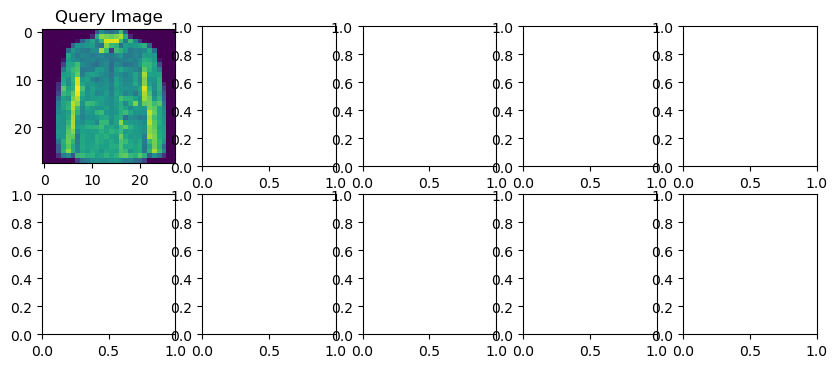

In [135]:
# Reshape the query image to its original shape
query_image = query_image.reshape(28,28)

# Create a figure with 10 subplots
fig, axs = plt.subplots(2, 5, figsize=(10, 4))

# Plot the query image in the first subplot
axs[0, 0].imshow(query_image)
axs[0, 0].set_title("Query Image")

# Plot the closest images in the remaining subplots
for i, ax in enumerate(axs.flat[1:]):
    ax.imshow(X_test[indices[0][i]].reshape(original_shape))
    ax.set_title("Image {}".format(i + 1))

plt.show()